In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset


In [6]:
# if you need to install anything you can do it this way: uncomment the packages
# you need and then you will need to restart your kernal
#%pip install cdo
#%pip install netCDF4
#%pip install xarray


**Monsoon Onset**


    
in this module we are going to use the onset index of Walker and Bordoni (2016), hereafter WB16

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071026

The key concept of this paper is that rather than assessing the onset date for the monsoon based directly on the precipitation, it instead examined the column water budget

The moisture flux convergence $MFC$ is calculated as

$$ MFC= P - E + \frac{\partial W}{\partial t} $$

where $P$ is precipiation, $E$ total surface evaporation, $W$ is the total column water vapor (sometimes referred to as the "precipitable water", or referred to as TCWV in the ECMWF grib table 128), and is defined as $ W = \int ^0_{p_0} q_v \frac{dp}{g}$.  

As pointed out by WB16: *"With negligible storage $\frac{\partial W}{\partial t}$, the dominant balance in the SASM region is between MFC and net precipitation (P-E). Thus, positive (negative) values of MFC correspond to positive (negative) net precipitation."*

They show these terms in their Figure 1, panel a for a square region defined for the South Asian summer Monsoon (SASM) over India, each of these terms is calculated as an *area average* for the region 10–30°N, 60–100°E.  They use MERRA reanalysis combined with GPCP for precipitation.


<img src="https://agupubs.onlinelibrary.wiley.com/cms/asset/4ae1c74d-9819-42b7-b037-923a8a804f02/grl55223-fig-0001-m.jpg" alt="Fig 1" width=500 height=500  />



just focus on panel a for the moment...  What do we see?

**Precipitation**:  The field is quite noisy in time, and starts to increase around day 150. 

**Evaporation**: The exceeds the precipitation at the start of the year, when precipitation is essentially zero.  It increases in the rainy season as the soil moisture increases but the seasonal variation is much less than that of the precipitation. 

**Storage**: The $\frac{\partial W}{\partial t}$ storage term ossililates around zero; storage is not that important it seems! (This is not always so true for other monsoon systems and is especially not the case in future, drastically warmer climates as we will see). 

Let's try to examine these timeseries.

If you are not familiar with netcdf file formats or the command line tool cdo (climate data operators) we suggest you follow the video series of ClimateUnboxed.  The following box would allow you to download the data to your laptop and calculate the box averages.

On the Copernicus Climate Data store for ERA5, these are the names of the variables

| eqn | long name           |  short name |
|-----|---------------------|-------------|
| $P$   | total_precipitation |  tp |
| $E$   | evaporation         |  e  |
| $\frac{\partial W}{\partial t}$ | vertical_integral_of_divergence_of_moisture_flux | VIDM |



** NOTE **
As the CDS is extremely slow at the moment, we prepared the timeseries data which can directly download using wget, or simply access directory online from the python netCDF4 utility. 

If you want to use the retrieve script later on, so you can change your data, you can watch the video tutorials on "ClimateUnboxed" and [see the instructions here](https://cds.climate.copernicus.eu/how-to-api) 


In [ ]:
import cdsapi
from cdo import Cdo

# make incidence 
client=cdsapi.Client()
cdo=Cdo()

# dataset we are using:
dataset = "derived-era5-single-levels-daily-statistics"

for year in range(1961,1971):
    for var in [
        "total_precipitation",
        "evaporation",
        "vertical_integral_of_divergence_of_moisture_flux"
    ]:
        
        request = {
    "product_type": "reanalysis",
            "variable": var,
    "year": str(year),  # recall that the year needs to be a string!
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
            "frequency": "1_hourly",
            "area": [60, -180, -40, 180]
}

        ifile="era5_daily_"+str(year)+"_"+var+".nc"
        ofile="era5_ts_"+str(year)+"_"+var+".nc"
        client.retrieve(dataset, request).download(ifile)
        cdo.fldmean(input="-sellonlatbox,60,100,10,30 "+ifile,output=ofile)

In [13]:
file="http://clima-dods.ictp.it/Users/tompkins/monsoons/era5/"
file="http://clima-dods.ictp.it/Users/tompkins/nextgems/test.nc"
url = ('http://clima-dods.ictp.it/Users/tompkins/nextgems/test.nc#mode=bytes')
dset = Dataset(url)
dset

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): value(462), time(120)
    variables(dimensions): float64 lat(value), float64 lon(value), int64 time(time), float64 tcwv(time, value)
    groups: 

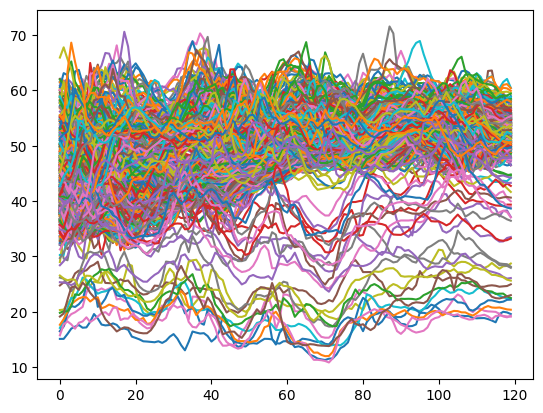

In [12]:
# make a simple line plot
fig,ax = plt.subplots()
tcwv=dset["tcwv"]
ax.plot(tcwv)

In [14]:
# discuss the line plot 


Now we add the cumsum and discuss the break point analysis 

introduce the break point analysis functions

repeat the line plot but add vertical line for the onset and mark the best fit 


now we do the interannual variability

finally we look at teh P-E approximation 

**Exercises**

P-E only 


** Projects**

Trends 

seasonal forecast?

compare to your favorite index



